In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree 
from sklearn.model_selection import GridSearchCV

In [25]:
path = r'E:\\学业\\IPS\\组会\\task_2\\03_trainingData_B1.csv'
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
train_df = pd.read_csv(path, header=0)
train_df = train_df[:]
train_df = train_df.replace('*',-110)

In [26]:
train_df['label']=0

C:\Users\Codex\AppData\Local\Temp\ipykernel_8776\2720751214.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['label']=0


In [27]:
train_df

,ID,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,checkSum,label
0,1,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911162,1:-7685.72349999845:4864929.89029999,0
1,2,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911145,1:-7685.72349999845:4864929.89029999,0
2,3,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911148,1:-7685.72349999845:4864929.89029999,0
3,4,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911151,1:-7685.72349999845:4864929.89029999,0
4,5,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911155,1:-7685.72349999845:4864929.89029999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,5244,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054764,4:-7587.10229999944:4864986.09099999,0
5244,5245,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5245,5246,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5246,5247,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0


In [28]:
#手动打标签，如果是坐标轴右上方的为标签1，左下方的为标签0

train_df.label[(train_df['LONGITUDE']<60) & (train_df['LATITUDE']<60)] =1
train_df.label[(train_df['LONGITUDE']>60) & (train_df['LATITUDE']>60)] =0

C:\Users\Codex\AppData\Local\Temp\ipykernel_8776\3633591595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[(train_df['LONGITUDE']<60) & (train_df['LATITUDE']<60)] =1
C:\Users\Codex\AppData\Local\Temp\ipykernel_8776\3633591595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[(train_df['LONGITUDE']>60) & (train_df['LATITUDE']>60)] =0


In [29]:
train_df_features = np.asarray(train_df.iloc[:,1:201])

In [30]:
train_df_features

array([[-110, -110, '-88', ..., -110, -110, -110],
       [-110, -110, '-87', ..., -110, -110, -110],
       [-110, -110, '-88', ..., -110, -110, -110],
       ...,
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110]], dtype=object)

In [31]:
train_df_label = np.asarray(train_df.iloc[:,211:212])

In [32]:
X_train,X_test,y_train,y_test = train_test_split(train_df_features,train_df_label,test_size=0.3)

In [33]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train,y_train)
Decision_Tree_score = clf.score(X_test,y_test)

In [34]:
Decision_Tree_score

0.9968253968253968

In [35]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [36]:
KNN.fit(X_train,y_train)
KNN_score = KNN.score(X_test,y_test)

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
KNN_score 

1.0

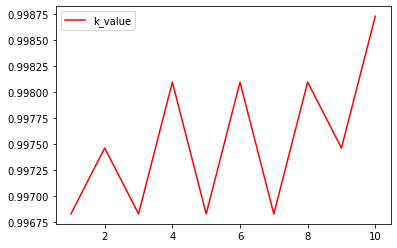

In [40]:
test = []
for k in range(10):
    KNN=KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="k_value")
plt.legend()
plt.show()

In [41]:
parameter = {'n_neighbors':[1,3,5,7,9,11]}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn,parameter,cv=5)
clf.fit(X_train, y_train)



D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [42]:
print(f'评估最合适的K值为：{(clf.best_params_)["n_neighbors"]}',"其准确率为：%.2f"%clf.best_score_)


评估最合适的K值为：3 其准确率为：1.00
